# AEROSP 536 Electric Propulsion: Homework 3
Jason Chen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pint import UnitRegistry
ureg = UnitRegistry(auto_reduce_dimensions=True)
Q_ = ureg.Quantity

## Problem 2
With the general formulation for specific impulse:
$$
I_{sp} = \frac{1}{g_0} \cos{\theta_D} \sqrt{2 \eta_f \eta_n (\langle h_c \rangle + \langle \mu_c \rangle)}
$$
We can simplify this since we are assuming 100% efficiency, and since for every propellant we are assuming it disassociates completely in the chamber and is frozen as a "base" molecule" (either $H_2$ or $N_2$), the heat of formation of all of these propellants (and thus $\langle \mu_c \rangle$) is zero. The expression simplifies to:
$$
I_{sp} = \frac{1}{g_0} \sqrt{2 \langle h_c \rangle}
$$
The molar fractions are given for each propellant, $X_i$. The equation for specific enthalpy for a given species is known, where $\bar{M}$ within the equation will be the molar mass of the molecule (and thus comes out in units with moles on the top). We correct for this in the enthalpy summation, where we get a mass fraction for a given species that is normalized by the total mass:
$$
M_{t} = X_{H2} M_{H2} + X_{N2} M_{N2}
$$
for example. $M_{H2}$ would be the molar mass of hydrogen. This would then allow us to apply a mass-weighted expression for enthalpy. For example for hydrazine or ammonia:
$$
h_c = \frac{X_{H2} M_{H2}}{M_{t}} h_{H2}(T) + \frac{X_{N2} M_{N2}}{M_t} h_{N2}(T)
$$

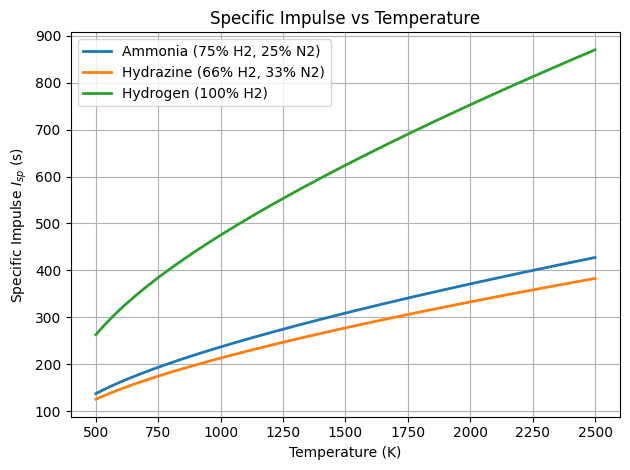

In [ ]:
coefficients = {
    "N2": {"A": 19.5,  "B": 19.8, "C": -8.6, "D": 1.4, "E": 0.5},
    "H2": {"A": 18.56, "B": 12.3, "C": -2.6, "D": 0.3, "E": 2.0},
}
M_h2, M_n2 = 2.016 * 1e-3, 28.0134 * 1e-3  # kg/mol

def h_species(T, A, B, C, D, E, M):
    theta = T / 1000.0
    term = A*theta + (B/2.0)*theta**2 + (C/3.0)*theta**3 + (D/4.0)*theta**4 - E*(1000.0/T)
    return term * 1e3 / M

def mass_fractions_from_mole(x_H2, x_N2):
    M_total = x_H2 * M_h2 + x_N2 * M_n2
    y_H2 = x_H2 * M_h2 / M_total
    y_N2 = x_N2 * M_n2 / M_total
    return y_H2, y_N2

def get_isp(T, x_H2, x_N2):
    h_H2 = h_species(T, **coefficients["H2"], M=M_h2)
    h_N2 = h_species(T, **coefficients["N2"], M=M_n2)
    # Convert to mass fractions for the frozen mixture
    y_H2, y_N2 = mass_fractions_from_mole(x_H2, x_N2)
    return (1/9.81) * np.sqrt(2.0 * (y_H2 * h_H2 + y_N2 * h_N2))

t_range = np.linspace(500, 2500, 1000)
ammonia_isp = get_isp(t_range, 0.75, 0.25)
hydrazine_isp = get_isp(t_range, 0.66, 0.33)
hydrogen_isp = get_isp(t_range, 1.00, 0.00)

plt.figure()
plt.plot(t_range, ammonia_isp, label='Ammonia (75% H2, 25% N2)', lw=2)
plt.plot(t_range, hydrazine_isp, label='Hydrazine (66% H2, 33% N2)', lw=2)
plt.plot(t_range, hydrogen_isp, label='Hydrogen (100% H2)', lw=2)
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Impulse $I_{sp}$ (s)')
plt.title('Specific Impulse vs Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Part (b)
We see that purely from a specific impulse perspective, hydrogen is the best propellant. This is consistent with chemical propulsion results, where the lighter the exhaust product, the higher the specific impulse (for the same energy and therefore temperature, you can accelerate a lighter particle to higher exit velocities).

## Problem 3
### Part (a) 
To solve for the rate of change of wire radius, we need to express the mass leaving the wire, as well as how much energy is required to expell that mass. We start with simple density and volume:
$$
m = \rho A l = \rho (\pi r^2) l
$$
where $\rho$ is the density of the material, and $r$ and $l$ are the dimensions of the wire. We can derive with respect to time the mass to get a mass removal rate as a function of radius, which yields:
$$
\frac{dm}{dt} = \rho l \pi (2r) \frac{dr}{dt}
$$
$$
\dot{r} = \frac{\dot{m}}{2 \pi \rho l r}
$$
Next, to know how much mass is lost, we use the relationship between power transferred and the latent heat of fusion $L_f$. The power dissipated by the wire is (from Ohm's Law):
$$
P = I^2 R
$$
Since the problem states that half the input power is put towards evaporation:
$$
P_{evap} = \frac{1}{2} I^2 R
$$
Looking at the units here: input power is joules/second, and latent heat is J/g. So since we're concerned about g/s (mass flow), we relate the two by:
$$
\dot{m} = -\frac{I^2 R}{2 L_f}
$$
Finally, to find the resistance of the wire, we approximate it as a cylinder and use the given resistivity:
$$
R = \Omega \frac{l}{A}
$$
Combining all the expressions together:

$$
\dot{r} = - \frac{1}{2 \pi \rho l r} \frac{I^2 \Omega l}{2 L_f A} = - \frac{1}{4 \pi^2 \rho r^3} \frac{I^2 \Omega}{L_f}
$$
$$
\boxed{\dot{r} = -\frac{I^2 \Omega}{4 \pi^2 \rho r^3 L_f}} 
$$

### Part (b)
To solve for the lifetime, we integrate both sides with respect to time, after separating the variables:
$$
\int_{0}^{t_f}{r^3 \frac{dr}{dt} dt} = \int_{0}^{t_f}{-\frac{I^2 \Omega}{4 \pi^2 \rho L_f} dt}
$$
$$
\int_{r_i}^{r_f}{r^3 dr} = \frac{1}{4}\left(r_f^4 - r_i^4 \right) = -\frac{I^2 \Omega}{4 \pi^2 \rho L_f} t
$$
We know the criterion of "exhausted" from the problem statement is when $r_f = 0.0001 r_i$, so substituting in and solving for the value for each material:

In [ ]:
I, r_i = 10, 0.5*1e-3
metals = {
    "tungsten": {"omega": 5.6e-8, "rho": 19.3, "L_f": 192},
    "copper": {"omega": 1.7e-8, "rho": 8.93, "L_f": 205},
    "aluminum": {"omega": 2.7e-8, "rho": 2.7, "L_f": 387},
    "tantalum": {"omega": 1.25e-7, "rho": 16.6, "L_f": 170}
}

def get_lifetime(omega, rho, L_f):
    r_f = 0.0001 * r_i
    L_f = L_f * 1e4
    rho = rho * 1e4
    return (np.pi**2 * rho * L_f * (r_i**4 - r_f**4)) / (I**2 * omega)

for metal in metals.keys():
    lifetime = get_lifetime(**metals[metal])
    print(f"{metal}: {lifetime/60/60:.2f} hours")


tungsten: 11.34 hours
copper: 18.45 hours
aluminum: 6.63 hours
tantalum: 3.87 hours


### Part (c)
Ranking purely based on lifetime:
1. Copper
2. Tungsten
3. Aluminum
4. Tantalum

### Part (d)
In this part, we'll use the enthalpy expression from the previous problem, except exclusively for hydrogen and at the melting point of each material. We determine $I_{sp}$ in the same way.

In [391]:
print(f"Tungsten Isp: {get_isp(3643, 1.0, 0.0):.2f} s")
print(f"Copper Isp: {get_isp(1353, 1.0, 0.0):.2f} s")
print(f"Aluminum Isp: {get_isp(933, 1.0, 0.0):.2f} s")
print(f"Tantalum Isp: {get_isp(3273, 1.0, 0.0):.2f} s")

Tungsten Isp: 1112.19 s
Copper Isp: 583.22 s
Aluminum Isp: 452.69 s
Tantalum Isp: 1036.60 s


### Part (e)
We want to find the maximum $\Delta v$ deliverable for each material of wire. We start with the rocket equation (due to low thrust trajectory assumption):
$$
\Delta v = I_{sp} g_0 \ln{\frac{m_0}{m_f}}
$$
We will assume that the dry mass of the spacecraft is dominated by the payload mass and power supply mass, since no other masses are given (and this is generally the case), meaning $m_f = m_p + \alpha P_{in}$. We can determine the initial mass using mass flow rate:
$$
m_0 = m_f + \dot{m} t
$$
We will plug in the time that the wire survives as the burn time $t$. The mass flow rate can be solved given the equation for thrust:
$$
T = \frac{2\eta P_{in}}{I_{sp} g_0}
$$
$$
\dot{m} = \frac{2\eta P_{in}}{(I_{sp} g_0)^2}
$$
Putting it together:
$$
\Delta v = I_{sp} g_0 \ln{\frac{m_f + \left( \frac{2\eta P_{in}}{(I_{sp} g_0)^2} \right) t}{m_f}}
$$

In [408]:
P_in, eta, alpha, m_p = Q_(5, "kW"), Q_(0.45, ""), Q_(0.025, "kg/W"), Q_(10, 'kg')
m_f = m_p + alpha * P_in
hours_data = {
    "tungsten": Q_(11.34, "hour"),
    "copper":   Q_(18.45, "hour"),
    "aluminum": Q_(6.63,  "hour"),
    "tantalum": Q_(3.87,  "hour"),
}
isp_data = {
    "tungsten": Q_(1112.19, "s"),
    "copper":   Q_(583.22,  "s"),
    "aluminum": Q_(452.69,  "s"),
    "tantalum": Q_(1036.60, "s"),
}
for metal in hours_data.keys():
    v_e = isp_data[metal] * Q_(9.81, "m/s^2")
    mdot = (2 * P_in * eta) / (v_e**2)
    delta_v = v_e * np.log((m_f + (mdot * hours_data[metal])) / m_f)
    print(f"{metal} delta_v: {delta_v.m_as('m/s'):.2f} m/s")

tungsten delta_v: 124.02 m/s
copper delta_v: 374.44 m/s
aluminum delta_v: 175.63 m/s
tantalum delta_v: 45.57 m/s


### Part (f)

$\Delta v$ is a better metric for the usefulness of the material, since it balances melting point and lifetime. Based on this, I would reorder the materials as follows:
1. Copper
2. Aluminum
3. Tungsten
4. Tantalum

## Problem 4
### Part (a)
We're asked to find the temperature at the centerline, which we can solve for by knowing the approximation for radial temperature variation in an arcjet as given in lecture:
$$
\eta \left( \frac{I}{A_t} \right)^2 = -\frac{1}{r} \frac{\partial}{\partial r} \left[ \Kappa r \frac{\partial T}{\partial r} \right]
$$

Integrating (area, current, and resistivity are constant radially from the problem statement):
$$
-\eta \left( \frac{I}{A_t} \right)^2 \int{r dr} = \int{ \frac{\partial}{\partial r} \left[ \Kappa r \frac{\partial T}{\partial r} \right] dr}
$$
$$
-\frac{\eta}{2} \left( \frac{I}{A_t} \right)^2 r^2 = \Kappa r \frac{\partial T}{\partial r}
$$
$$
\int_{r}^{R}{\frac{\partial T}{\partial r} dr} = T(R) - T(r) = \int_{r}^{R}{-\frac{\eta}{2\Kappa} \left( \frac{I}{A_t} \right)^2 rdr} = -\frac{\eta}{4\Kappa} \left( \frac{I}{A_t} \right)^2 \left(R^2 - r^2\right)
$$
$$
T(0) = \left( \frac{\eta R^2}{4\Kappa} \left( \frac{I}{A_t} \right)^2 \right) + T(R)
$$

So the above expression gives the temperature at any point $r$ where $0 \leq r \leq R$, and if we plug in $r=0$ we get the temperature at the centerline. The only unknown is the resistivity, $\eta$, which we have an expression for below:
$$
\eta = \frac{m_e v_{te} \sigma_G}{q^2} \left( \frac{n_G}{n_e} \right)
$$
where $m_e$ is the mass of an electron, $v_{te}$ is the thermal electron speed, $q$ is charge, $\sigma_G$ is the cross section of a gas molecule, $n_G$ and $n_e$ are the densities of neutral gas and electrons. Solving the above:

In [409]:
m_e = Q_(9.109e-31, 'kg')
q = Q_(1.602e-19, 'C')
k_B = Q_(1.38e-23, 'J/K')
T_e = Q_(1, 'eV')/Q_(8.617e-5, 'eV/K')
v_te = np.sqrt((8 * k_B * T_e) / (np.pi * m_e))
r_throat = Q_(1.2, 'cm') 
A_throat = np.pi * (r_throat**2)
nn_ne = Q_(1/0.01, 'dimensionless')
r_d = Q_(145, 'picometer')
sigma_G = np.pi * (r_d**2)
eta = ((m_e * v_te * sigma_G) / (q**2)) * nn_ne
I = Q_(350, 'A')
kappa = Q_(0.367, 'W/m/K')
T_m = Q_(2700, 'K')
T_center = (eta * r_throat**2)/(4 * kappa) * ((I/A_throat)**2) + T_m
print(f"Centerline temperature: {T_center.m_as('K'):.1f} K")

Centerline temperature: 11910.3 K


### Part (b)
To simplify the specific impulse equation, we look at continuity: $\dot{m} = \rho A u$, which in full form over an area is $\dot{m} = \int_A \rho(r) u(r) dA$. This means the formulation of mass flow itself already is performing the integral over the throat area of the velocity and density profiles, and so we can pull out and cancel the $\rho(r)$ and $\u(r)$ terms we see in the $I_{sp}$ equation. We don't know the exact profile, but we do know that the integrals will cancel. Knowing this, we can simplify the $I_{sp}$ equation to:
$$
I_{sp} = \frac{1}{g_0} \sqrt{\frac{4 \pi\eta}{A} \int_0^R{\epsilon_c (r) rdr}}
$$

$\epsilon_c(r)$ is the specific energy in the throat, and since we know the kinetic energy is negligable per the problem statement, $h_0 = h + \frac{1}{2}u^2 = h$, where we know from equipartition to be a distribution of contributions between the different energy modes. Since the vibrational mode is inactive, we only have the translational and rotational modes:
$$
\epsilon_c(r) = h_c(r) = \frac{k_B T(r)}{m_A} \left( \frac{5}{2} + Br \right)
$$
This equation is for a linear diatomic molecule, which is the case for $H_2$, and we know $Br = 1$. Thus the above equation can be plugged in, with the known dependence of temperature on radius from Part (a).

$$
I_{sp} = \frac{1}{g_0} \sqrt{\frac{14 \pi\eta k_B}{A m_A} \int_0^R{T(r) rdr}}
$$
$$
I_{sp} = \frac{1}{g_0} \sqrt{\frac{14 \pi\eta k_B}{A m_A} \int_0^R{\left[T(R) + \frac{\eta}{4\Kappa} \left( \frac{I}{A_t} \right)^2 \left(R^2 - r^2\right)\right] rdr}}
$$

Let $\alpha = \frac{\eta}{4\Kappa} \left( \frac{I}{A_t} \right)^2$.
$$
I_{sp} = \frac{1}{g_0} \sqrt{\frac{14 \pi\eta k_B}{A m_A} \int_0^R{\left[T(R)r + \alpha R^2 r - \alpha r^3\right] dr}}
$$
$$
I_{sp} = \frac{1}{g_0} \sqrt{\frac{14 \pi\eta k_B}{A m_A} \left( \frac{T(R)}{2} R^2 + \frac{\alpha}{4} R^4 \right)}
$$

Plugging in and checking this integral in Mathematica, we get:
$$
\boxed{I_{sp} = 812.4 \textrm{ s}}
$$

### Part (c)
With a uniform temperature profile, $T(0) = T_m$, and generally for an electrothermal thruster:
$$
I_{sp} = \frac{1}{g_0} \cos{\theta_D} \sqrt{2 \eta_f \eta_n (\langle h_c \rangle + \langle \mu_c \rangle)}
$$
Since we know the divergence efficiency is $\eta_d = \cos{\theta_D}^2$, we can move it inside the square root. We also know $\langle \mu_c \rangle = 0$ since $H_2$ is in its natural state, and so there is no heat of formation. $\langle h_c \rangle$ is found similarly to above, where since there is now a uniform temperature, from equipartition we know the enthalpy:
$$
\langle h_c \rangle = \frac{7}{2} \frac{k_B T_m}{m_{H2}}
$$

In [410]:
g0 = Q_(9.81, 'm/s^2')
efficiency = Q_(0.3, 'dimensionless')
m_H2 = Q_(3.35e-27, 'kg')
isp_resistojet = (1/g0) * np.sqrt(2 * efficiency * ((7/2) * (k_B * T_m)/m_H2))
print(f"Resistojet specific impulse with uniform temperature: {isp_resistojet.m_as('s'):.1f} s")
print(f"Ratio: {812.4/isp_resistojet.m_as('s'):.2f}")

Resistojet specific impulse with uniform temperature: 492.7 s
Ratio: 1.65


The specific impulse of an arcjet is 65% higher than that of a resistojet, for the same efficiency losses.

### Part (d)
For temperature, we can plot the function we've found in previous parts. For the neutral density, we can use the fact that it is normalized to cancel certain terms. Starting with the ideal gas law:
$$
f_n = \frac{pV}{R_u T}
$$
where $f_n$ is the number of moles of neutral gas. Dividing both sides by volume, we see that we can get a molar density as a function of a constant (pressure is given to be constant, and the universal gas constant is constant) and $T(r)$, which we know from above. Thus we expect $n_n$ to just be a linear slope applied on $T(r)$.
$$
n_n = \frac{p}{R_u} T(r)
$$
Since we're normalizing by the maximum value, the constants in the above equation cancel out in the normalization operation. Thus, $n_n$ is just the inverse of $T(r)$.

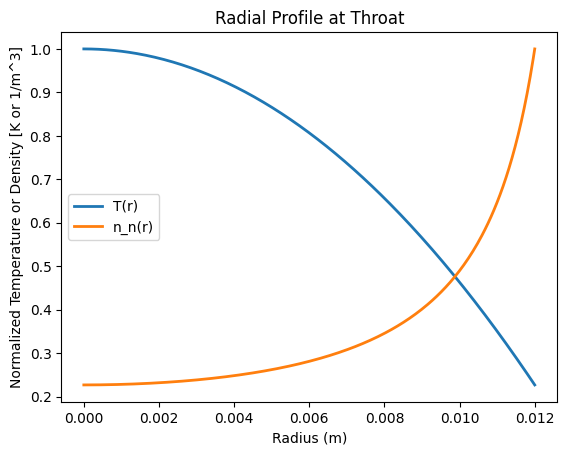

In [411]:
r_vals = np.linspace(0, r_throat.m_as('m'), 300)
factor = (eta.to_base_units().magnitude / (4 * kappa.to_base_units().magnitude)) * ((I.m_as('A') / A_throat.m_as('m^2')) ** 2)
T_r = T_m.m_as('K') + factor * (r_throat.m_as('m')**2 - r_vals**2)
norm_T = np.divide(T_r, max(T_r))
norm_n = np.divide(1/T_r, max(1/T_r))

plt.figure()
plt.plot(r_vals, norm_T, lw=2, label='T(r)')
plt.plot(r_vals, norm_n, lw=2, label='n_n(r)')
plt.xlabel('Radius (m)')
plt.ylabel('Normalized Temperature or Density [K or 1/m^3]')
plt.legend()
plt.title('Radial Profile at Throat')
plt.show()

### Part (e)
We know that the current density is constant at the throat and so we can use Ohm's Law to find the resistance between anode/cathode and gas:
$$
\boxed{R_A = R_C = \frac{V}{I} = \frac{T_e}{q I} = 2.86 \textrm{ m}\Omega}
$$
The resistance across the gas can be approximated by a cylinder with poor conduction, where $\eta_G$ is the resistivity that we've already found at the throat, and $l$ is the length given.
$$
\boxed{R_G = \eta_G \frac{l}{A} = 0.104 \textrm{ }\Omega}
$$

### Part (f)
To find the input power, we simply use Ohm's Law again, with the resistance being the total resistance in series. Same can be done to find the resistance at the cathode:
$$
\boxed{P_in = I^2(R_A + R_c + R_G) = 12.37 \textrm{ kW}}
$$
$$
\boxed{P_c = I^2(R_c) = 349 \textrm{ W}}
$$
$$
\boxed{\frac{P_c}{P_{in}} = 2.8 \%}
$$
We can see that arcjets have a very low percentage of power that is being deposited into the cathode (hardware, that has a given lifetime when exposed to energy) as opposed to the resistivity of the gas, when compared to resistojets. This inherently means that arcjets, for the same power, can have longer lifetimes than resistojets.

## Problem 5
### Part (a)

In this magnetic nozzle problem, we are asked to find the heater, frozen flow, and divergence efficiencies. Starting with the heater efficiency $\eta_h$, we know that generally:

$$ \eta_h = 1-\frac{\dot{Q}_{loss}}{P_{in}} $$

where $\dot{Q}_{loss}$ is the total heat lost in the heater/process as opposed to the power input $P_{in}$. From the problem statement, we know the lost heat is dominated by transfer across the back wall area, which is given by:
$$
\dot{Q}_{wall} = \frac{n_e (k_B T_e)^{3/2} A_{wall}}{4\sqrt{m_i}} \left[ \frac{5}{2}+2\ln{\sqrt{\frac{m_i}{m_e}}} \right]
$$
The only unknown in this equation (others are known constants or given in the problem statement) is $n_e$, which is the electron particle density in the chamber. We can find this using the given information: the electron and ion mole fractions are equal ($n_i = n_e$), inlet mass flow rate is known, and noting the continuity equation:
$$
\dot{m} = \rho A v
$$
We know the neutral mass flow into the engine, given as a standard volumetric flow rate. To convert 1 sccm to a mass flow rate, we multiply by the density of xenon at standard temperature and pressure (for US units, 68 Fahrenheit and 1 atm).
$$
0.7 \times \dot{m}_{in} = \dot{m}_{out} = \textrm{SCCM} \times \rho_{STP}
$$
From the statement that the ions begin with the thermal velocity at 300 K and the chamber diameter, we can solve for the mass density of the ions, $\rho_i$. The thermal velocity is given by:
$$
u_{thermal} = \sqrt{\frac{8k_B T}{\pi m_n}}
$$
Finally, with $\rho_i$, we can convert to a particle density by dividing by the molar weight and using Avogadro's number:
$$
n_e = n_i = [\rho_i / (0.1313 \textrm{ kg/mol})](6.02 \times 10^{23}) 
$$


In [412]:
k_B = Q_(1.38e-23, 'J/K')  # Boltzmann constant
m_n = Q_(131.3, 'amu')  # Mass of xenon atom
T = Q_(300, 'K')  # Thermal velocity temperature
rho_stp = Q_(5.8965, 'kg/m^3')  # Xenon density at STP
mdot_in = 0.7 * Q_(1, 'cm^3/min') * rho_stp
u_thermal = np.sqrt((8 * k_B * T)/(np.pi * m_n))
A_chamber = np.pi * (Q_(2, 'cm')**2) / 4
rho_i = mdot_in / (u_thermal * A_chamber)
n_e = (rho_i / Q_(131.3, 'g/mol')) * Q_(6.022e23, '1/mol')
print(f"Electron number density, n_e: {n_e.m_as('1/m^3'):.2e} 1/m^3")

Electron number density, n_e: 4.57e+18 1/m^3


Plugging into the $\dot{Q}_{wall}$ equation (while searching up the mass of an electron):

In [413]:
T_e = Q_(10, 'eV')/Q_(8.617e-5, 'eV/K')
constant = 5/2 + 2 * np.log(np.sqrt(m_n / Q_(9.12e-31, 'kg')))
Q_dot_wall = ((n_e * (k_B * T_e)**(3/2) * A_chamber) / (4 * np.sqrt(m_n))) * constant
P_in = Q_(30, 'W')
print(f"Heat flow rate at wall: {Q_dot_wall.m_as('W'):.1f} W")
eta_h = (1 - Q_dot_wall / P_in)
print(f"Heating efficiency: {eta_h.m_as('dimensionless'):.2%}")


Heat flow rate at wall: 23.2 W
Heating efficiency: 22.75%


To find the divergence efficiency, it is simple trigonometry (note we use the half-angle):
$$
\eta_{D} = \cos{\theta_D}^2 = \left(\frac{\sqrt{3}}{2}\right)^2 = 75 \%
$$

To find the frozen flow efficiency, we can start with the general form which is essentially the residual energy over the total available energy:
$$
\eta_f = \frac{(\langle h_c \rangle + \langle \mu_c \rangle) - (\langle h_e \rangle + \langle \mu_e \rangle)}{\langle h_c \rangle + \langle \mu_c \rangle} \approx 1 - \frac{\langle \mu_e \rangle}{\langle h_c \rangle + \langle \mu_c \rangle}
$$
since $T_e << T_c$, so this assumption is valid. In chemical contexts, $\mu_e$ is the residual chemical (stored bond) energy, i.e. how much heat of formation is yet to be released in the exhaust product. In this context, it is analagous to the amount of ions still present in the exhaust times the first ionization energy, since this would be the amount of energy that could have been used to produce momentum for the vehicle, but is instead unaffected by the magnetic nozzle. In other words:
$$
\mu_e = \epsilon_{iz} f_n
$$
where $f_n$ is the mole fraction of neutral atoms at the exit (different from $n_n$ since this is not normalized by volume). Since we know from the problem statement that $\dot{m}_{i,out} = 0.7 \dot{m}_{total,in}$ and that a single neutral Xenon atom produces exactly 1 electron and 1 ion when ionized, then $f_n = 0.3$ and $f_i = f_e = 0.7$. Since we know the relative concentrations of particles does not change, $\mu_e = \mu_c$.

The total available energy in the heating chamber will be the mass (and since flux is constant, mole fraction is analagous) that has been ionized, which is $f_i = f_e$. Assuming a calorically perfect gas (valid at the temperature of 300 K), its energy can be found by $h = c_p T$, or since Xenon is a monoatomic gas with only translational and vibrational modes of energy storage, we get $h_c = \frac{5}{2} f k_B T$ for each neutrals and ions, while electron thermal energy can be approximated as $k_B T_e$, with the initial temperature of electrons in the chamber being given.

Putting it together:
$$
\eta_f = 1 - \frac{\langle \mu_e \rangle}{\langle h_c \rangle + \langle \mu_c \rangle} = 1-\frac{\epsilon_{iz} f_n}{k_B(\frac{5}{2} f_i T_i + \frac{5}{2} f_n T_n + f_e T_e) + \epsilon_{iz} f_n}
$$

In [414]:
mu = Q_(12.13, 'eV') * 0.3
eta_f = 1-(mu/(k_B*((5/2)*0.7*T + (5/2)*0.3*T + 0.7*T_e) + mu))
print(f"Frozen flow efficiency: {eta_f.m_as('dimensionless'):.2%}")
print(f"Total efficiency: {(eta_h * 0.75 * eta_f).m_as('dimensionless'):.2%}")

Frozen flow efficiency: 65.99%
Total efficiency: 11.26%


Putting it together:
$$
\boxed{\eta = \eta_h \eta_d \eta_f = 11.3 \%}
$$
This is a very low efficiency, but is dominated by the heating efficiency.

### Part (b)
To find specific impulse and thrust, we use the average exit velocity (ideally we would use the integral to find the actual effective velocity, but we don't have enough information here). From lecture:
$$
\langle u_e \rangle = \sqrt{\frac{2 P_{in}}{\dot{m}} \eta}
$$
We get:
$$
\boxed{I_{sp} = \langle u_e \rangle / g_0 = 1010.2 \textrm{ s}}
$$
We will assume matched conditions at the exit (vacuum operation, and the fact that temperature reaches zero at the exit), so no pressure thrust:
$$
\boxed{F_t = \dot{m} \langle u_e \rangle = 0.7 \textrm{ mN}}
$$

In [415]:
u_e = np.sqrt((2 * P_in / mdot_in) * (eta_h * 0.75 * eta_f))
I_sp = u_e / Q_(9.81, 'm/s^2')
thrust = mdot_in * u_e
print(f"Specific Impulse: {I_sp.m_as('s'):.1f} s")
print(f"Thrust: {thrust.m_as('mN'):.3f} mN")

Specific Impulse: 1010.2 s
Thrust: 0.682 mN


### Part (c)
The performance we derived here is much lower than the reported $40 \%$ overall efficiency, and this is likely due to a couple possible factors:
- The heating efficiency seems irregularly low in our derivation, but assuming it's correct, then recent advances in X-ray heating could allow the real device to package the chamber in a smaller area, thereby decreasing heat loss through the walls 
- The ionization process in the real device may be more efficient, as the frozen flow losses come from unionized neutral atoms. It's possible that at higher input powers, the ionization process scales to be more efficient much better than at lower power
- The assumption that there is no recombination of ions and electrons is likely not true, but this would actually lower efficiency since the magnetic nozzle would not be able to fully accelerate that mass. This points to the fact that our efficiency calculation may be flawed in some way